# Wandb Integration

In [ ]:
pip install --upgrade wandb

In [ ]:
!wandb login dd888f73500a67fc53f9191092b22f3946ac0e02

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Init wandb
import wandb
from wandb.keras import WandbCallback

wandb.init(project="assignment-2", entity="ravi-kumar")

# Declare Hyperparameters

# Imports

In [1]:
import random
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

# Loading Dataset

In [2]:
def load_data():
  with tf.device('/device:GPU:0'):
    train_dir='/content/drive/MyDrive/Deep Learning/inaturalist_12K/train'
    test_dir='/content/drive/MyDrive/Deep Learning/inaturalist_12K/val'
    train_data = image_dataset_from_directory(
        train_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=32,
        image_size=(256, 256),
        shuffle=True,
        seed=0,
        validation_split=0.1,
        subset="training",
        interpolation="bilinear",
        follow_links=False,
    )
    val_data = image_dataset_from_directory(
        train_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=32,
        image_size=(256, 256),
        shuffle=True,
        seed=0,
        validation_split=0.1,
        subset="validation",
        interpolation="bilinear",
        follow_links=False,
    )
    test_data = image_dataset_from_directory(
        test_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=32,
        image_size=(256, 256),
        shuffle=True,
        seed=0,
        interpolation="bilinear",
        follow_links=False,
    )
  
  return train_data, val_data, test_data


In [5]:
with tf.device('/device:GPU:0'):
  train_data, val_data, test_data=load_data()
  class_names=train_data.class_names
  # train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
  # val_data = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
  # test_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 10017 files belonging to 10 classes.
Using 9016 files for training.
Found 10017 files belonging to 10 classes.
Using 1001 files for validation.
Found 2001 files belonging to 10 classes.


# Visualising Data

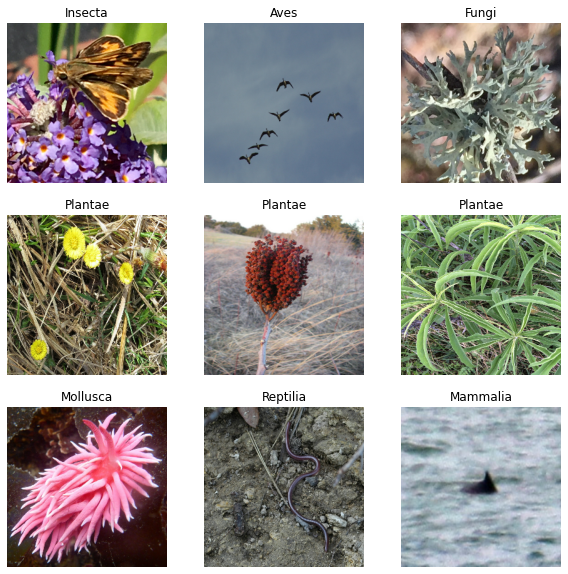

In [44]:
image=None
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  image=images[0]
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')


# Part A

## Question 1

In [ ]:
with tf.device('/device:GPU:0'):
  # Params
  input_shape = (256, 256, 3)
  output_size = len(class_names)
  act_funcs = ['relu', 'relu', 'relu', 'relu', 'relu', 'relu']
  filters = [32, 16, 128, 256, 64]
  kernel_sizes = [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
  dense_layer_size = 64
  dropout = 0.1
  lr = 0.001
  batch_normalization = True
  data_augmentation = False
  epochs = 1

  model = Sequential()
  # Convolution
  model.add(Conv2D(filters[0], kernel_sizes[0], activation=act_funcs[0], input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if batch_normalization: model.add(BatchNormalization(axis=1))
  model.add(Conv2D(filters[1], kernel_sizes[1], activation=act_funcs[1]))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if batch_normalization: model.add(BatchNormalization(axis=1))
  model.add(Conv2D(filters[2], kernel_sizes[2], activation=act_funcs[2]))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if batch_normalization: model.add(BatchNormalization(axis=1))
  model.add(Conv2D(filters[3], kernel_sizes[3], activation=act_funcs[3]))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if batch_normalization: model.add(BatchNormalization(axis=1))
  model.add(Conv2D(filters[4], kernel_sizes[4], activation=act_funcs[4]))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Classification
  model.add(Dropout(dropout))
  model.add(Flatten())
  if batch_normalization: model.add(BatchNormalization(axis=1))
  model.add(Dense(dense_layer_size, activation=act_funcs[5]))
  model.add(Dense(output_size, activation='softmax'))

  # model.summary()

  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                metrics=['accuracy'])

  model.fit(train_data, validation_data=val_data, epochs=epochs)

## Question 2

## Data Augmentation

In [7]:
with tf.device('/device:GPU:0'):
  DataAugmentation = Sequential(
    [tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256, 256, 3)),
      tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
      tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
      tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2)]
  )

In [ ]:
def train():
  with tf.device('/device:GPU:0'):
    config_defaults = {
        'data_augmentation': True,
        'filters': [16, 32, 64, 128, 256],
        'kernel_size': [2, 2, 3, 4, 5],
        'activations': ['relu', 'relu', 'relu', 'relu', 'relu', 'relu'],
        'learning_rate': 0.001,
        'dense_layer_size': 64,
        'dropout' : 0.1,
        'batch_normalization': True,
        'epochs': 3
    }
    wandb.init(config=config_defaults)
    config= wandb.config
    # Params
    input_shape = (256, 256, 3)
    output_size = len(class_names)
    act_funcs = config.activations
    filters = config.filters
    kernel_sizes = config.kernel_sizes
    dense_layer_size = config.dense_layer_size
    lr = config.learning_rate
    dropout = config.dropout
    batch_normalization = config.batch_normalization
    data_augmentation = config.data_augmentation
    epochs= config.epochs

    model = Sequential()
    # Input Normalization
    model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
    # Data Augmentation
    if data_augmentation: model.add(DataAugmentation)
    # Convolution
    model.add(Conv2D(filters[0], kernel_sizes[0], activation=act_funcs[0], input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[1], kernel_sizes[1], activation=act_funcs[1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[2], kernel_sizes[2], activation=act_funcs[2]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[3], kernel_sizes[3], activation=act_funcs[3]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[4], kernel_sizes[4], activation=act_funcs[4]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Classification
    model.add(Dropout(dropout))
    model.add(Flatten())    
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Dense(dense_layer_size, activation=act_funcs[5]))    
    model.add(Dense(output_size, activation='softmax'))

    # model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy'])

    model.fit(train_data, validation_data=val_data, epochs=epochs, callbacks=[WandbCallback()])

In [ ]:
# Configure the sweep – specify the parameters to search through, the search strategy, the optimization metric et all.
sweep_config = {
    'method': 'random', #grid, random
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'data_augmentation':{
            'values':[True, False]
        },
        'filters': {
            'values': [[32, 64, 128, 64, 32], [128, 128, 64, 64, 64], [64, 32, 16, 64, 128], [16, 32, 256, 128, 64], [64, 16, 32, 128, 256], [64, 32, 128, 64, 256], [64, 16, 32, 128, 256]] # list(itertools.permutations([16, 32, 64, 128, 256]))
        },
        'kernel_sizes':{
            'values': [[2] * 5] # [list(p) for p in itertools.product([2, 3, 4, 5], repeat=5)]
        },
        'learning_rate':{
            'values': [0.0001]
        },
        'activations':{
            'values': [['relu', 'relu', 'relu', 'relu', 'relu', 'sigmoid']] # [list(p) for p in itertools.product(['sigmoid', 'tanh', 'relu'], repeat=6)]
        },
        'dense_layer_size':{
            'values': [128, 256] # [16, 32, 64, 128, 256]
        },
        'dropout' :{
            'values': [0.2, 0.3]
        },
        'batch_normalization': {
            'values': [True, False]
        },
        'epochs':{
            'values': [5, 10]
        }

    }
}


## Calling Sweep Agent

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="ravi-kumar", project="assignment-2-Part-A")
wandb.agent(sweep_id, train)

# Question 4 (Testing)

In [ ]:
  with tf.device('/device:GPU:0'): 
    input_shape = (256, 256, 3)
    output_size = len(class_names)
    act_funcs = ['relu', 'relu', 'relu', 'relu', 'relu', 'sigmoid']
    filters = [64, 16, 32, 128, 256]
    kernel_sizes = [2, 2, 2, 2, 2] #[2, 2, 2, 2, 2]
    dense_layer_size = 256
    dropout = 0.2
    lr = 0.0001
    batch_normalization = True
    data_augmentation = True
    epochs = 5

    model = Sequential()
    # Input Normalization
    model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
    # Data Augmentation
    if data_augmentation: model.add(DataAugmentation)
    # Convolution
    model.add(Conv2D(filters[0], kernel_sizes[0], activation=act_funcs[0], input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[1], kernel_sizes[1], activation=act_funcs[1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[2], kernel_sizes[2], activation=act_funcs[2]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[3], kernel_sizes[3], activation=act_funcs[3]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[4], kernel_sizes[4], activation=act_funcs[4]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Classification
    model.add(Dropout(dropout))
    model.add(Flatten())
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Dense(dense_layer_size, activation=act_funcs[5]))
    model.add(Dense(output_size, activation='softmax'))

    # model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy'])

    model.fit(train_data, validation_data=val_data, epochs=epochs)

## Evaluating the model [Q4 (a)]

In [10]:
with tf.device('/device:GPU:0'): 
  loss, accuracy = model.evaluate(test_data)
  print('Loss: ',loss,'Accuracy: ', accuracy)

63/63 [==============================] - 507s 8s/step - loss: 1.9326 - accuracy: 0.3288
Loss:  1.932606816291809 ,	 Accuracy:  0.3288355767726898


## Showing the predictions in a grid [Q4 (b)]

In [ ]:
with tf.device('/device:GPU:0'): 
  plt.figure(figsize=(15, 50))
  for images, labels in test_data.take(1):
    for i in range(30):
        pred= model.predict(np.expand_dims(images[i], axis=0))
        plt.subplot(10, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title('Predicted: '+ class_names[np.argmax(pred)] +', True: '+ class_names[np.argmax(labels[i])])
        # plt.grid(False)
        plt.axis('off')


## Visualising the filters in first layer [Q4 (c)]

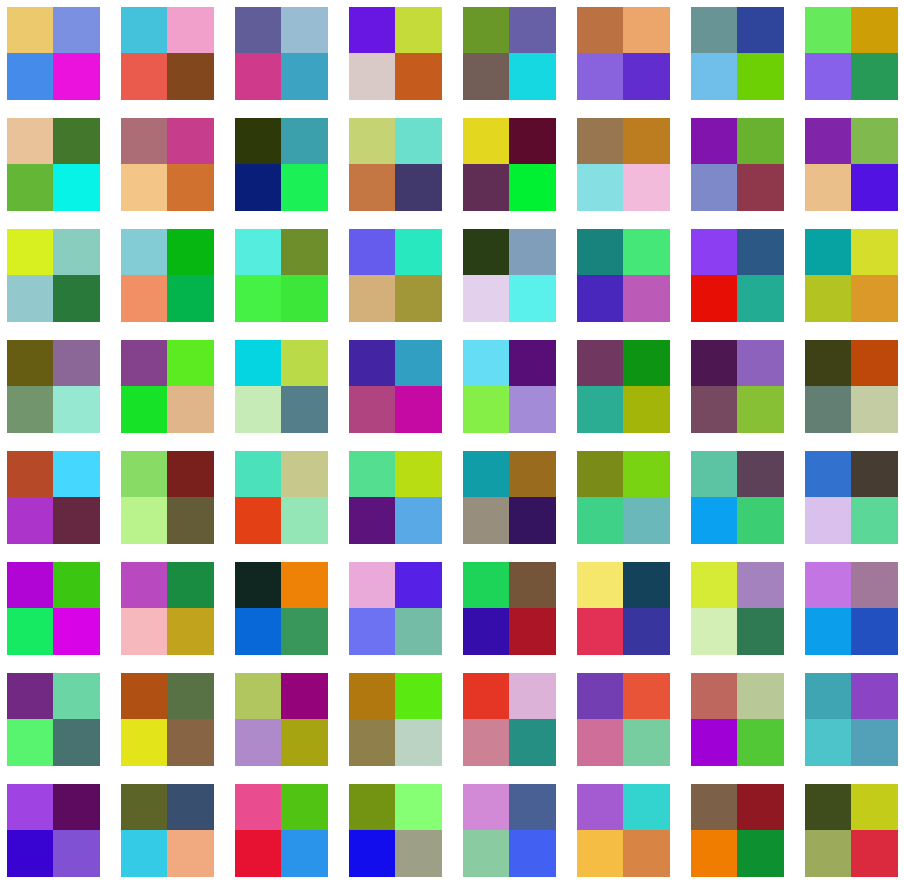

In [54]:
with tf.device('/device:GPU:0'): 
  conv_layers=[]
  for layer in model.layers:
    if 'conv' in layer.name:
      conv_layers.append(layer)      
  
  filters, biases = conv_layers[0].get_weights()
  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)
  n_filters, ix = filters.shape[3], 1
  plt.figure(figsize=(16, 16))
  for i in range(n_filters):
    f = filters[:, :, :, i]
    plt.subplot(8, 8, i+1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
  plt.show()

# Question 5 (Guided Backpropagation)

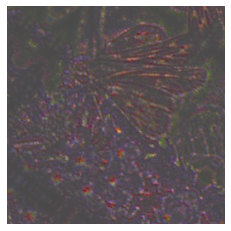

In [45]:
  with tf.device('/device:GPU:0'): 
    input_shape = (256, 256, 3)
    output_size = len(class_names)
    act_funcs = ['relu', 'tanh', 'relu', 'relu', 'sigmoid', 'tanh']
    filters = [64, 16, 32, 128, 256]
    kernel_sizes = [2, 2, 2, 2, 2]
    dense_layer_size = 256
    dropout = 0.2
    lr = 0.0001
    batch_normalization = True
    data_augmentation = True
    epochs = 10

    model = Sequential()
    # Input Normalization
    model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
    # Data Augmentation
    if data_augmentation: model.add(DataAugmentation)
    # Convolution
    model.add(Conv2D(filters[0], kernel_sizes[0], activation=act_funcs[0], input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[1], kernel_sizes[1], activation=act_funcs[1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[2], kernel_sizes[2], activation=act_funcs[2]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[3], kernel_sizes[3], activation=act_funcs[3]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters[4], kernel_sizes[4], activation=act_funcs[4]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Classification
    model.add(Dropout(dropout))
    model.add(Flatten())
    if batch_normalization: model.add(BatchNormalization(axis=1))
    model.add(Dense(dense_layer_size, activation=act_funcs[5]))
    model.add(Dense(output_size, activation='softmax'))

    gb_model = tf.keras.models.Model(
        inputs =  [model.inputs],
        outputs = [model.layers[14].output]
    )

    layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer, 'activation')]

    @tf.custom_gradient
    def guidedRelu(x):
      def grad(dy):
        return tf.cast(dy>0, 'float32') * tf.cast(x>0, 'float32') * dy
      return tf.nn.relu(x), grad

    for layer in layer_dict:
      if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu

    with tf.GradientTape(persistent=True) as tape:
      inputs = tf.cast(np.expand_dims(image, axis=0), 'float32')
      tape.watch(inputs)
      outputs = gb_model(inputs)[0]

    grads = tape.gradient(outputs, inputs)[0]
    guided_back_prop = grads

    gb = np.dstack((
        guided_back_prop[:, :, 0],
        guided_back_prop[:, :, 1],
        guided_back_prop[:, :, 2],
    ))

    gb -= np.min(gb)
    gb /= np.max(gb)

    plt.imshow(gb)
    plt.axis('off')
    plt.show()      
      

    # model.summary()

    # model.compile(loss='categorical_crossentropy',
    #               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    #               metrics=['accuracy'])

    # model.fit(train_data, validation_data=val_data, epochs=epochs)